# Test Qdrant Search and Query Capabilities

This notebook demonstrates various ways to search and retrieve datapoints from your Qdrant collection.

In [4]:
# Import necessary libraries
import sys
import os
sys.path.append("..")
from utils.qdrant_client import get_qdrant_client, get_embedding, search_datapoints, test_connection, COLLECTION_NAME
from dotenv import load_dotenv
import pandas as pd
from IPython.display import display, Markdown, HTML

# Load environment variables
load_dotenv()

# Test connection
test_connection()

✅ Successfully connected to Qdrant Cloud.
Available collections: ['logistics_datapoints']
✅ Successfully connected to Google Embedding API.
Embedding dimension: 768
✅ Collection 'logistics_datapoints' exists with None points


True

## Basic Semantic Search

In [5]:
def display_results(results, query=None):
    """Format and display search results in a readable way"""
    if query:
        display(Markdown(f"## Search results for: '{query}'"))
    
    if not results:
        display(Markdown("*No results found*"))
        return
        
    for i, result in enumerate(results, 1):
        display(Markdown(f"### Result {i} - Score: {result.score:.4f}"))
        
        # Extract basic info
        datapoint_id = result.payload.get('datapoint_id', 'No ID')
        datapoint_type = result.payload.get('datapoint_type', 'N/A')
        port_area = result.payload.get('port_area', result.payload.get('domain_area', 'N/A'))
        entity = result.payload.get('relevant_entity', 'N/A')
        category = result.payload.get('regulation_category', 'N/A')
        subcategory = result.payload.get('regulation_subcategory', 'N/A')
        detail = result.payload.get('regulation_detail', 'N/A')
        
        # Display basic info
        info = f"**ID:** {datapoint_id}  \n"
        info += f"**Type:** {datapoint_type}  \n"
        info += f"**Area:** {port_area}  \n"
        info += f"**Entity:** {entity}  \n"
        info += f"**Category:** {category}  \n"
        info += f"**Subcategory:** {subcategory}  \n\n"
        info += f"**Detail:** {detail}  \n"
        
        # Add keywords if available
        if 'keywords' in result.payload and result.payload['keywords']:
            keywords = ', '.join(result.payload['keywords'])
            info += f"\n**Keywords:** {keywords}"
        
        display(Markdown(info))
        display(Markdown("---"))

In [7]:
# Basic semantic search
query = "Requirements for container seals and security"
results = search_datapoints(query, limit=3)
display_results(results, query)

# Search with port area filter
port_query = "Customs documentation requirements"
port_results = search_datapoints(
    port_query, 
    filter_conditions={"port_area": "Singapore"},
    limit=3
)
display_results(port_results, f"{port_query} (in Singapore)")

# Search with normalized entity filter
entity_query = "Safety requirements"
entity_results = search_datapoints(
    entity_query, 
    filter_conditions={"relevant_entity": "Vessel"}, # Using normalized entity name
    limit=3
)
display_results(entity_results, f"{entity_query} (for Vessels)")

# Search for multiple normalized entities
multi_entity_query = "Documentation requirements"
# Perform separate searches for each entity and combine results
shipper_results = search_datapoints(
    multi_entity_query,
    filter_conditions={"relevant_entity": "Shipper"},
    limit=2
)
customs_results = search_datapoints(
    multi_entity_query,
    filter_conditions={"relevant_entity": "Customs Authority"},
    limit=2
)
# Combine the results
multi_entity_results = shipper_results + customs_results
display_results(multi_entity_results, f"{multi_entity_query} (for Shippers and Customs Authorities)")

## Search results for: 'Requirements for container seals and security'

### Result 1 - Score: 0.8198

**ID:** YANGSHAN_DP_MARITIME_CODE_CARRIER_DUE_DILIGENCE_CARGO_FITNESS_022  
**Type:** Regulation  
**Area:** International  
**Entity:** Carrier  
**Category:** Carrier Obligations  
**Subcategory:** Due Diligence - Cargo Fitness  

**Detail:** Carriers must ensure vessel components are 'fit and safe for their reception, carriage and preservation' of goods.  

**Keywords:** legal framework, maritime code, carrier obligation, due diligence, cargo fitness, vessel components, cargo reception, cargo carriage, cargo preservation, article 47

---

### Result 2 - Score: 0.7975

**ID:** YANGSHAN_DP_ENV_PROTECTION_HAZARDOUS_CARGO_SAFETY_OBLIGATION_REVISITED_084  
**Type:** Obligation  
**Area:** Yangshan  
**Entity:** Shipper (Hazardous/Dangerous Goods)  
**Category:** Environmental Protection  
**Subcategory:** Hazardous Cargo Handling Safety  

**Detail:** Shippers, cargo owners, and agents handling hazardous cargo are subject to enhanced obligations to ensure safety and environmental protection.  

**Keywords:** environmental protection, hazardous cargo, shipper obligation, cargo owner obligation, agent obligation, enhanced obligations, safety protocols, dangerous goods

---

### Result 3 - Score: 0.7771

**ID:** IMO_DP_SOLAS_CSM_MANDATORY_VESSEL_007  
**Type:** Requirement  
**Area:** International - IMO  
**Entity:** Vessel  
**Category:** Carriage of Cargoes  
**Subcategory:** SOLAS - Chapter VI  

**Detail:** Cargo Securing Manual (CSM) is mandatory on vessels carrying containers, detailing the proper stowage and securing arrangements.  

**Keywords:** SOLAS, CSM, Cargo Securing Manual, vessel, containers, stowage, securing

---

## Search results for: 'Customs documentation requirements (in Singapore)'

### Result 1 - Score: 0.8164

**ID:** SINGAPORE_DP_PORT_CLEARANCE_CERTIFICATE_REGISTRY_PRODUCTION_205  
**Type:** Requirement  
**Area:** Singapore  
**Entity:** Vessel Operator  
**Category:** Port Clearance  
**Subcategory:** Port Clearance Conditions  

**Detail:** Port Master may require production of certificate of registry for port clearance.  

**Keywords:** port clearance condition, certificate of registry, vessel documents, document production, Port Master discretion

---

### Result 2 - Score: 0.8068

**ID:** SINGAPORE_DP_PORT_CLEARANCE_APPLICATION_DOCS_OTHER_DEPARTURE_198  
**Type:** Requirement  
**Area:** Singapore  
**Entity:** Vessel Operator  
**Category:** Documentation  
**Subcategory:** Departure Documents  

**Detail:** Port clearance application requires providing any other documents required by Port Master.  

**Keywords:** port clearance application, departure documents, other documents, additional documents, Port Master discretion, mandatory documents

---

### Result 3 - Score: 0.8061

**ID:** SINGAPORE_DP_PORT_CLEARANCE_CUSTOMS_COMPLIANCE_CONDITION_203  
**Type:** Requirement  
**Area:** Singapore  
**Entity:** Vessel Operator  
**Category:** Port Clearance  
**Subcategory:** Port Clearance Conditions  

**Detail:** Port clearance not granted if owner/agent/master has not complied with Regulation of Imports and Exports Act.  

**Keywords:** port clearance condition, customs compliance, import/export regulations, regulatory compliance

---

## Search results for: 'Safety requirements (for Vessels)'

### Result 1 - Score: 0.6951

**ID:** YANGSHAN_DP_ENV_PROTECTION_VESSEL_STRUCTURE_EQUIPMENT_COMPLIANCE_054  
**Type:** Requirement  
**Area:** Yangshan  
**Entity:** Vessel  
**Category:** Environmental Protection  
**Subcategory:** Vessel Standards  

**Detail:** Vessel structures and anti-pollution equipment must comply with relevant regulations and undergo qualification examinations at Yangshan.  

**Keywords:** environmental protection, vessel structure, anti-pollution equipment, compliance, regulation compliance, qualification examination, vessel standards, equipment standards, vessel integrity

---

### Result 2 - Score: 0.6834

**ID:** IMO_DP_MLC_MEDICAL_CARE_ONBOARD_039  
**Type:** Requirement  
**Area:** International - ILO/IMO  
**Entity:** Vessel  
**Category:** Health Protection and Medical Care  
**Subcategory:** MLC, 2006 - Title 4  

**Detail:** Ships are required to carry a medical chest, medical equipment, and have trained personnel to provide medical care on board, in accordance with MLC, 2006.  

**Keywords:** MLC, 2006, medical care, onboard medical care, medical chest, medical equipment, health protection, requirement, ship

---

### Result 3 - Score: 0.6559

**ID:** SINGAPORE_DP_DEFINITION_VESSEL_152  
**Type:** Definition  
**Area:** Singapore  
**Entity:** Vessel  
**Category:** Definitions  
**Subcategory:** Vessels  

**Detail:** "vessel" includes any ship or boat or air‑cushioned vehicle or floating rig or platform used in any form of operations at sea.  

**Keywords:** definition, vessel, ship, boat, maritime vessel, vessel type

---

## Search results for: 'Documentation requirements (for Shippers and Customs Authorities)'

### Result 1 - Score: 0.6843

**ID:** IMO_DP_DGD_CERTIFICATION_SHIPPER_RESPONSIBILITY_097  
**Type:** Responsibility  
**Area:** International - Safety/Regulations  
**Entity:** Shipper  
**Category:** Dangerous Goods Regulations  
**Subcategory:** Dangerous Goods Declaration (DGD) - Key Information  

**Detail:** A signed certification statement on the DGD signifies the shipper's responsibility for the accurate classification, packaging, marking, labeling, and documentation of the dangerous goods.  

**Keywords:** Dangerous Goods Declaration, DGD, certification statement, shipper responsibility, responsibility, accuracy, compliance, legal responsibility

---

### Result 2 - Score: 0.6544

**ID:** IMO_DP_SOLAS_VGM_REQ_001  
**Type:** Requirement  
**Area:** International - IMO  
**Entity:** Shipper  
**Category:** Safety Regulations  
**Subcategory:** SOLAS - Container Weight Verification (VGM)  

**Detail:** Shippers are required to provide the Verified Gross Mass (VGM) of a packed container to the carrier and the terminal before loading onto a ship.  

**Keywords:** SOLAS, VGM, container weight, verified gross mass, mandatory, shipper, documentation

---

### Result 3 - Score: 0.6714

**ID:** IMO_DP_SAFE_ADVANCE_CARGO_INFO_STD_042  
**Type:** Standard  
**Area:** International - WCO  
**Entity:** Customs Authority  
**Category:** Customs Procedures  
**Subcategory:** WCO SAFE Framework - Core Element 1  

**Detail:** The WCO SAFE Framework standard requires customs administrations to harmonize the collection of advance electronic cargo information for risk assessment.  

**Keywords:** WCO SAFE Framework, advance cargo information, electronic data, customs data, data harmonization, standard, risk assessment

---

### Result 4 - Score: 0.6309

**ID:** IMO_DP_SAFE_RISK_MANAGEMENT_PRINCIPLE_045  
**Type:** Principle  
**Area:** International - WCO  
**Entity:** Customs Authority  
**Category:** Customs Procedures  
**Subcategory:** WCO SAFE Framework - Core Element 2  

**Detail:** The WCO SAFE Framework promotes the principle of consistent risk management approach by customs administrations to focus on high-risk shipments and expedite low-risk cargo.  

**Keywords:** WCO SAFE Framework, risk management, principle, customs control, targeting, high-risk cargo, trade facilitation

---

## Filtered Search by Port Area

In [8]:
# Search with port area filter
port_query = "Customs documentation requirements"
port_results = search_datapoints(
    port_query, 
    filter_conditions={"port_area": "Singapore"},
    limit=3
)
display_results(port_results, f"{port_query} (in Singapore)")

## Search results for: 'Customs documentation requirements (in Singapore)'

### Result 1 - Score: 0.8164

**ID:** SINGAPORE_DP_PORT_CLEARANCE_CERTIFICATE_REGISTRY_PRODUCTION_205  
**Type:** Requirement  
**Area:** Singapore  
**Entity:** Vessel Operator  
**Category:** Port Clearance  
**Subcategory:** Port Clearance Conditions  

**Detail:** Port Master may require production of certificate of registry for port clearance.  

**Keywords:** port clearance condition, certificate of registry, vessel documents, document production, Port Master discretion

---

### Result 2 - Score: 0.8068

**ID:** SINGAPORE_DP_PORT_CLEARANCE_APPLICATION_DOCS_OTHER_DEPARTURE_198  
**Type:** Requirement  
**Area:** Singapore  
**Entity:** Vessel Operator  
**Category:** Documentation  
**Subcategory:** Departure Documents  

**Detail:** Port clearance application requires providing any other documents required by Port Master.  

**Keywords:** port clearance application, departure documents, other documents, additional documents, Port Master discretion, mandatory documents

---

### Result 3 - Score: 0.8061

**ID:** SINGAPORE_DP_PORT_CLEARANCE_CUSTOMS_COMPLIANCE_CONDITION_203  
**Type:** Requirement  
**Area:** Singapore  
**Entity:** Vessel Operator  
**Category:** Port Clearance  
**Subcategory:** Port Clearance Conditions  

**Detail:** Port clearance not granted if owner/agent/master has not complied with Regulation of Imports and Exports Act.  

**Keywords:** port clearance condition, customs compliance, import/export regulations, regulatory compliance

---

## Search with Entity Filter

In [9]:
# Search with entity filter
entity_query = "Safety requirements"
entity_results = search_datapoints(
    entity_query, 
    filter_conditions={"relevant_entity": "Vessel"}, 
    limit=3
)
display_results(entity_results, f"{entity_query} (for Vessels)")

## Search results for: 'Safety requirements (for Vessels)'

### Result 1 - Score: 0.6951

**ID:** YANGSHAN_DP_ENV_PROTECTION_VESSEL_STRUCTURE_EQUIPMENT_COMPLIANCE_054  
**Type:** Requirement  
**Area:** Yangshan  
**Entity:** Vessel  
**Category:** Environmental Protection  
**Subcategory:** Vessel Standards  

**Detail:** Vessel structures and anti-pollution equipment must comply with relevant regulations and undergo qualification examinations at Yangshan.  

**Keywords:** environmental protection, vessel structure, anti-pollution equipment, compliance, regulation compliance, qualification examination, vessel standards, equipment standards, vessel integrity

---

### Result 2 - Score: 0.6834

**ID:** IMO_DP_MLC_MEDICAL_CARE_ONBOARD_039  
**Type:** Requirement  
**Area:** International - ILO/IMO  
**Entity:** Vessel  
**Category:** Health Protection and Medical Care  
**Subcategory:** MLC, 2006 - Title 4  

**Detail:** Ships are required to carry a medical chest, medical equipment, and have trained personnel to provide medical care on board, in accordance with MLC, 2006.  

**Keywords:** MLC, 2006, medical care, onboard medical care, medical chest, medical equipment, health protection, requirement, ship

---

### Result 3 - Score: 0.6559

**ID:** SINGAPORE_DP_DEFINITION_VESSEL_152  
**Type:** Definition  
**Area:** Singapore  
**Entity:** Vessel  
**Category:** Definitions  
**Subcategory:** Vessels  

**Detail:** "vessel" includes any ship or boat or air‑cushioned vehicle or floating rig or platform used in any form of operations at sea.  

**Keywords:** definition, vessel, ship, boat, maritime vessel, vessel type

---

## Keyword-Based Search

In [10]:
# Search with keywords filter
keyword_query = "Environmental requirements"
keyword_results = search_datapoints(
    keyword_query, 
    filter_conditions={"keywords": ["environment", "emission", "pollution"]},
    limit=3
)
display_results(keyword_results, f"{keyword_query} (with environmental keywords)")

## Search results for: 'Environmental requirements (with environmental keywords)'

### Result 1 - Score: 0.6454

**ID:** ANTWERP_DP_ENVIRONMENT_WASTE_CONTAINER_VESSEL_NOTIFICATION_24H_008  
**Type:** Requirement  
**Area:** N/A  
**Entity:** Container Vessel (Sea-going)  
**Category:** Environment - Waste Management  
**Subcategory:** Waste Notification  

**Detail:** Masters of seagoing vessels, including container vessels, must provide prior notification of waste 24 hours before arrival.  

**Keywords:** waste notification, 24 hours, seagoing vessels, container vessels, waste management, Port of Antwerp, environment, requirement

---

### Result 2 - Score: 0.6400

**ID:** YANGSHAN_DP_ENVIRONMENT_EMISSION_REDUCTION_CO2_011  
**Type:** Fact  
**Area:** Yangshan  
**Entity:** Intelligent Production Control System  
**Category:** Environment  
**Subcategory:** Emission Reduction  

**Detail:** Utilizing the intelligent production management control system contributes to reducing carbon dioxide emissions by about 10%.  

**Keywords:** environment, emission reduction, carbon dioxide, CO2, sustainability, green port, intelligent system, automation, environmental impact

---

### Result 3 - Score: 0.5783

**ID:** ANTWERP_DP_ENVIRONMENT_WASTE_CONTAINER_VESSEL_MANDATORY_DEPOSIT_010  
**Type:** Regulation  
**Area:** N/A  
**Entity:** Container Vessel (Sea-going)  
**Category:** Environment - Waste Management  
**Subcategory:** Waste Delivery  

**Detail:** Seagoing vessels calling at Port of Antwerp, including container vessels, must deposit waste at a port reception facility before leaving.  

**Keywords:** waste deposit, port reception facility, seagoing vessels, container vessels, waste management, Port of Antwerp, environment, regulation, mandatory

---

## Advanced Query Examples

In [12]:
# Keyword-based search with normalized entities
keyword_query = "Environmental compliance"
keyword_results = search_datapoints(
    keyword_query, 
    filter_conditions={
        "keywords": ["environment", "emission", "pollution"],
        "relevant_entity": "Vessel" # Using normalized entity
    },
    limit=3
)
display_results(keyword_results, f"{keyword_query} (with environmental keywords, for Vessels)")

# Compare results across ports
compare_query = "Container inspection procedures"
ports = ["Rotterdam", "Singapore", "Hamburg"]
for port in ports:
    port_specific = search_datapoints(
        compare_query,
        filter_conditions={"port_area": port},
        limit=1
    )
    display_results(port_specific, f"{compare_query} (in {port})")

## Search results for: 'Environmental compliance (with environmental keywords, for Vessels)'

*No results found*

## Search results for: 'Container inspection procedures (in Rotterdam)'

### Result 1 - Score: 0.7048

**ID:** ASIA_EUROPE_DIFF_REGULATORY_CHINA_STATE_CONTROLLED_031  
**Type:** Difference  
**Area:** ['Shanghai', 'Rotterdam', 'Hamburg', 'Singapore']  
**Entity:** Regulatory Environment  
**Category:** Regulatory Environment  
**Subcategory:** General Regulatory Style  

**Detail:** China's customs regulations (Shanghai) are part of a comprehensive state-controlled system, potentially more bureaucratic compared to EU.  

**Keywords:** regulatory environment, state-controlled, bureaucracy, China, EU, comparison

---

## Search results for: 'Container inspection procedures (in Singapore)'

### Result 1 - Score: 0.7588

**ID:** SINGAPORE_DP_PORT_REG_DANGEROUS_CARGO_STOWAGE_CONVEYANCE_169  
**Type:** Regulation  
**Area:** Singapore  
**Entity:** Dangerous Goods Handling  
**Category:** Port Regulations  
**Subcategory:** Dangerous Cargo Handling  

**Detail:** Authority may regulate utilizing, stowing, keeping dangerous cargoes on vessels, conveyance with other goods in port.  

**Keywords:** port regulations, dangerous cargo, hazardous materials, cargo stowage, cargo handling, cargo segregation

---

## Search results for: 'Container inspection procedures (in Hamburg)'

### Result 1 - Score: 0.7048

**ID:** ASIA_EUROPE_DIFF_REGULATORY_CHINA_STATE_CONTROLLED_031  
**Type:** Difference  
**Area:** ['Shanghai', 'Rotterdam', 'Hamburg', 'Singapore']  
**Entity:** Regulatory Environment  
**Category:** Regulatory Environment  
**Subcategory:** General Regulatory Style  

**Detail:** China's customs regulations (Shanghai) are part of a comprehensive state-controlled system, potentially more bureaucratic compared to EU.  

**Keywords:** regulatory environment, state-controlled, bureaucracy, China, EU, comparison

---

## Entity Distribution Analysis

## Top 10 Normalized Entities in the Collection

,Entity,Count
8,Seller,116
9,Buyer,107
4,Vessel,98
14,Customer,25
105,Authority,23
42,Master/Agent,22
35,General,21
57,Shipping Agent/Vessel,20
5,Vessel Operator,19
31,Harbour Master,16


<Figure size 1000x600 with 0 Axes>

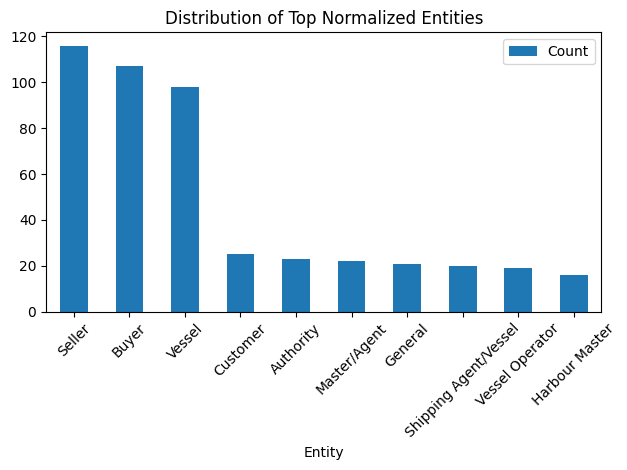

In [13]:
# Analyze normalized entity distribution
from collections import Counter

client = get_qdrant_client()
points, _ = client.scroll(
    collection_name=COLLECTION_NAME,
    limit=2000,
    with_payload=["relevant_entity", "port_area"],
    with_vectors=False
)

# Extract entities
entities = [p.payload.get("relevant_entity") for p in points if "relevant_entity" in p.payload]
entity_counts = Counter(entities)

# Display top entities
display(Markdown("## Top 10 Normalized Entities in the Collection"))
entity_df = pd.DataFrame({"Entity": list(entity_counts.keys()), 
                          "Count": list(entity_counts.values())})
entity_df = entity_df.sort_values("Count", ascending=False).head(10)
display(entity_df)

# Optional: Plot distribution
try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    entity_df.plot.bar(x="Entity", y="Count", rot=45)
    plt.title("Distribution of Top Normalized Entities")
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Matplotlib not available for plotting")